Considerando o simulador que o grupo escolheu no primeiro projeto, simule a fonte de ruído e gere 4 sinais senoidais com frequências de 1 kHz, 10 kHz, 50 kHz e 100 kHz. Após isso, projete dois filtros RC (um passa-baixa e outro passa-alta, ambos com frequência de 30 kHz) nas suas versões passivas e nas suas versões ativas com AmpOp. A seu critério, escolha os diversos outros parâmetros, se necessários, e os valores dos componentes. Faça uma análise em frequência das respostas dos filtros. Entrega: relatório e apresentação.

In [9]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [10]:
# Creating the signal

fs = 1e6 # 1MHz Sampling frequency (Hz) > 2*100kHz
Ts = 1/fs # 1 us (sampling period)
T0 = 1e-3 # 1 ms (total time of the signal)
N = int(T0/Ts) # Number of samples


t = np.linspace(0, T0, N) # Time vector
signals = {
    '1kHz': np.sin(2*np.pi*1e3*t),
    '10kHz': np.sin(2*np.pi*10e3*t),
    '50kHz': np.sin(2*np.pi*50e3*t),
    '100kHz': np.sin(2*np.pi*100e3*t),
}

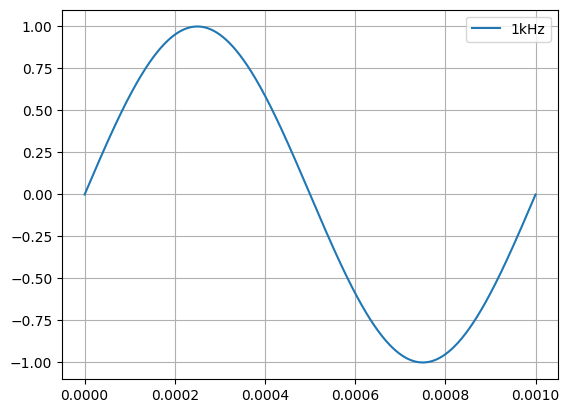

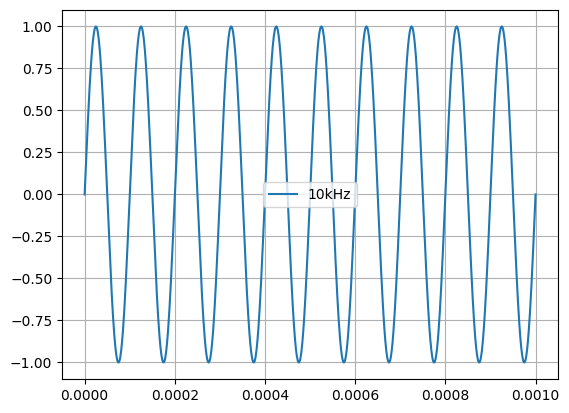

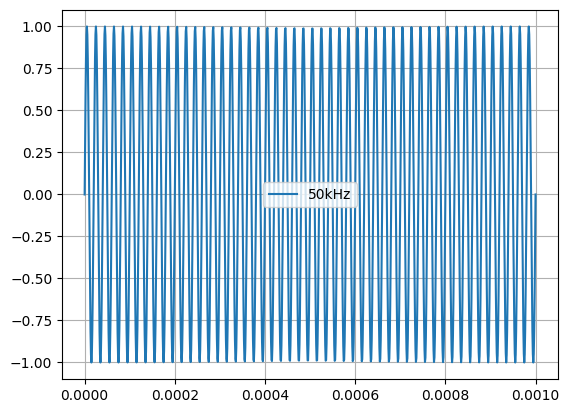

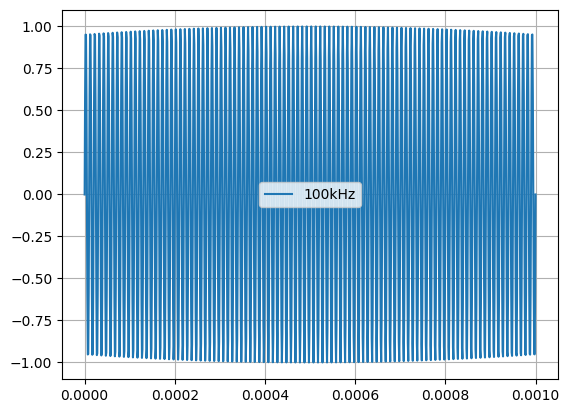

In [11]:
for key in signals:
    plt.figure()
    plt.plot(t, signals[key], label=key)
    plt.legend()
    plt.grid()

In [12]:
# Generate gaussian noise
np.random.seed(42)
mu = 0  # mean
sigma = 1  # standard deviation
white_noise = np.random.normal(mu, sigma, N)

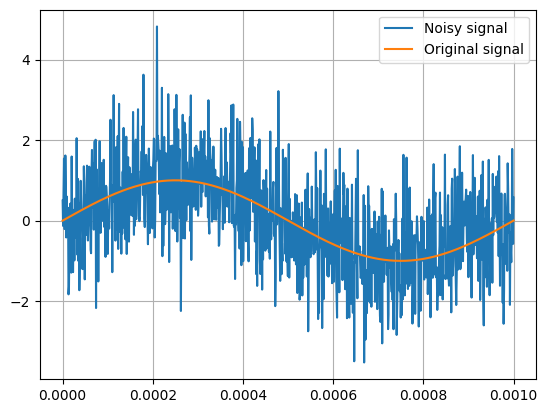

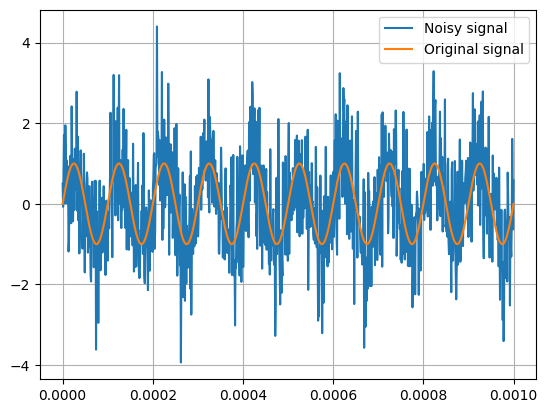

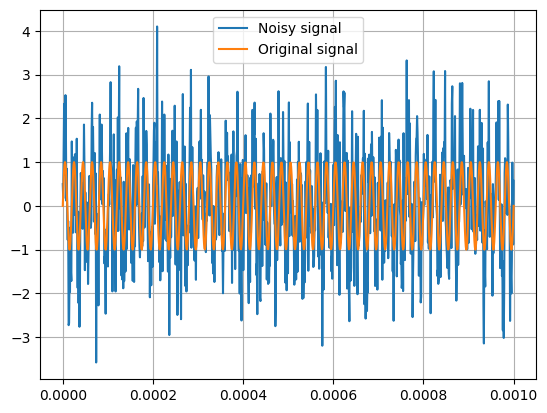

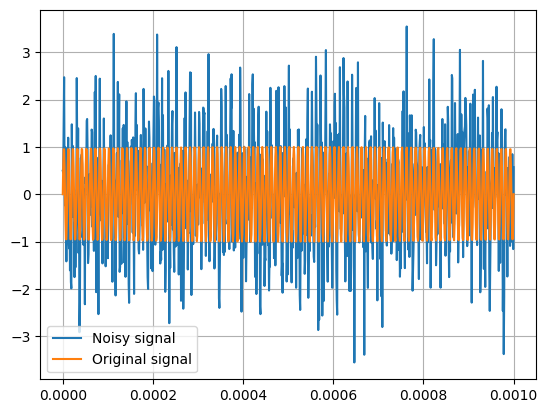

In [15]:
noisy_signals = {}

for key in signals.keys():
    noisy_signals[key] = signals[key] + white_noise
    plt.figure()
    plt.plot(t, noisy_signals[key], label='Noisy signal')
    plt.plot(t, signals[key], label='Original signal')
    plt.legend()
    plt.grid()


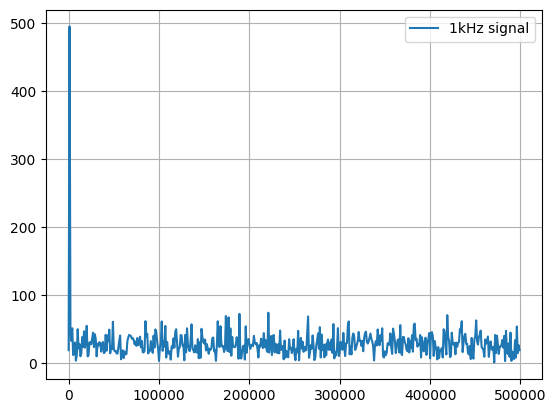

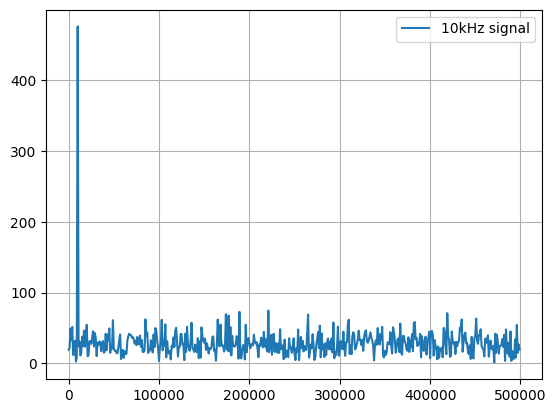

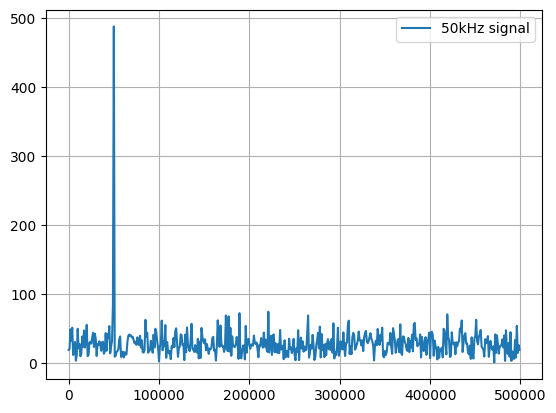

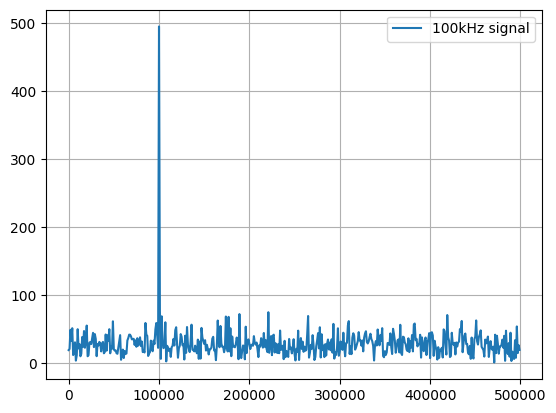

In [26]:
# Obtain the noise signal in the frequency domain
freqs = np.fft.fftfreq(N, Ts)
freq_domain_signals = {}

freqs = freqs[:N//2]

for key in noisy_signals.keys():
     freq_domain_signals[key] = np.fft.fft(noisy_signals[key])[:N//2]
     plt.figure()
     plt.plot(freqs, np.abs(freq_domain_signals[key]), label=f'{key} signal')
     plt.legend()
     plt.grid()

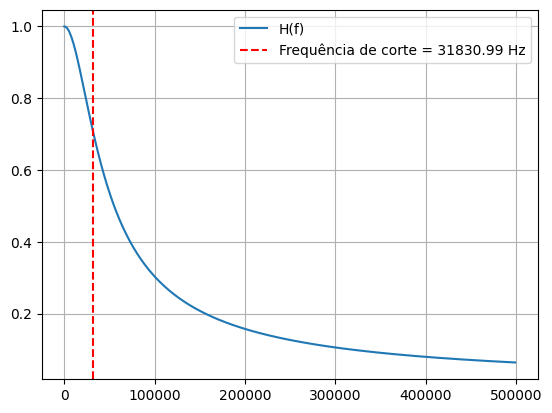

In [81]:
# creating the passive low pass filter RC
R = 5e3 # 5k Ohm
C = 1e-9 # 1pF

fc = 1/(2*np.pi*R*C) # cutoff frequency
s = 2j*np.pi*freqs # s = jw complex frequency vector
num = -1/(R*C)
den = s - 1/(R*C)
H = num/den

points_in_graph = 500
plt.plot(freqs[:points_in_graph], np.abs(H)[:points_in_graph], label='H(f)')
plt.axvline(x=fc, color='r', linestyle='--', label=f'Frequência de corte = {fc:.2f} Hz')
plt.legend()
plt.grid()

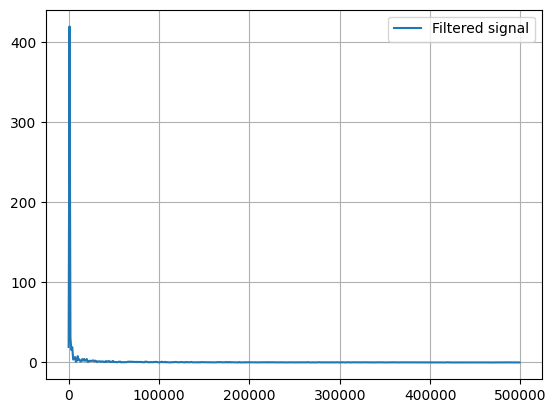

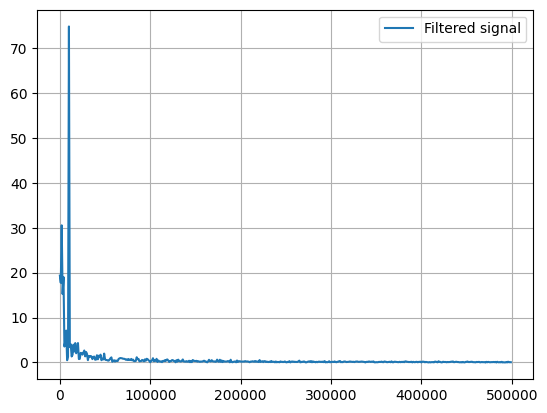

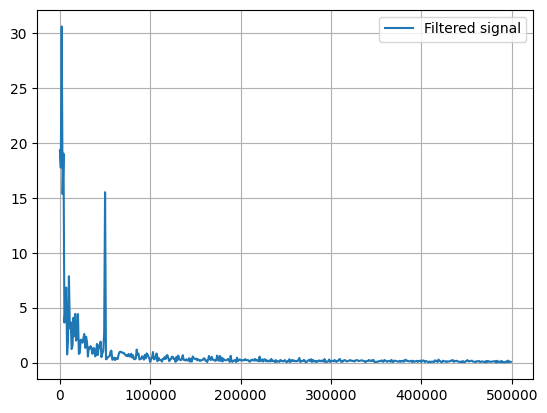

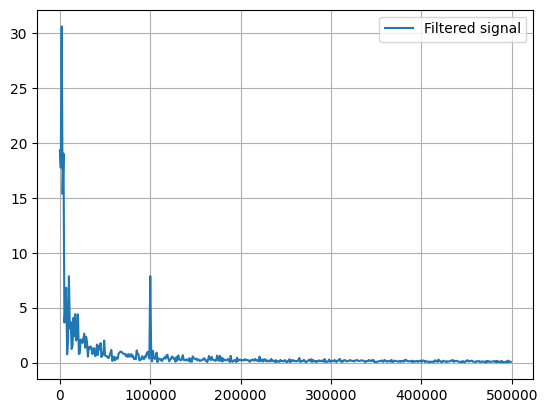

In [64]:
fft_filtered_signals = {}

for key in signals.keys():
    fft_filtered_signals[key] = H * freq_domain_signals[key]
    plt.figure()
    plt.plot(freqs, abs(fft_filtered_signals[key]), label='Filtered signal')
    plt.legend()
    plt.grid()